In [250]:
from platform import python_version

print(python_version())


3.7.6


In [1]:
import pandas as pd
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

In [19]:
datasetout = pd.read_excel("wyniki.xlsx")
datasetout.head()

,Unnamed: 0,Diameter,Length,Radius,Fit,IT,Ra,Rm,IDPart,Moc_tok,...,Fc_dop_3,Fc_dop_min,Tolerancja,P_uzyteczna,Vc,n,dop_posuw,Q,t_g,sztuk
0,0,38.0,80.0,0.0,k6,6,0.63,420,Part0001,7.5,...,1080.0,1080.0,0.016,5.625,312.500000,2427.37,0.12,275.51,0.65,92
1,1,40.0,33.0,0.0,h8,8,1.25,420,Part0001,7.5,...,1080.0,1080.0,0.039,5.625,312.500000,2427.37,0.15,229.59,0.65,92
2,2,45.0,72.0,0.0,k6,6,0.63,420,Part0001,7.5,...,1080.0,1080.0,0.016,5.625,312.500000,2427.37,0.29,114.80,0.65,92
3,3,40.0,48.0,0.0,h8,8,1.25,420,Part0001,7.5,...,1080.0,1080.0,0.039,5.625,312.500000,2427.37,0.15,229.59,0.65,92
4,4,75.0,110.0,0.0,k6,6,0.63,1000,Part0002,7.5,...,2280.0,2280.0,0.019,5.625,148.026316,561.22,0.05,160.71,8.82,7


In [20]:
datasetout.Fit = datasetout.Fit.map({'d10':1,'e8':2,'f7':3,'f8':4,'g6':5,'g7':6,'h6':7,'h7':8,'h8':9,'h9':10,'j5':11,'j6':12,
                              'k5':13,'k6':14,'k7':15,'k8':16,'m6':17,'m7':18,'n6':19,'p6':20,'p7':21,'r6':22})
# Zastapienie NaN zerem
datasetout['Fit'] = datasetout['Fit'].replace(np.nan, 0)
datasetout

,Unnamed: 0,Diameter,Length,Radius,Fit,IT,Ra,Rm,IDPart,Moc_tok,...,Fc_dop_3,Fc_dop_min,Tolerancja,P_uzyteczna,Vc,n,dop_posuw,Q,t_g,sztuk
0,0,38.0,80.0,0.0,14.0,6,0.63,420,Part0001,7.5,...,1080.0,1080.0,0.016,5.625,312.500000,2427.37,0.12,275.51,0.65,92
1,1,40.0,33.0,0.0,9.0,8,1.25,420,Part0001,7.5,...,1080.0,1080.0,0.039,5.625,312.500000,2427.37,0.15,229.59,0.65,92
2,2,45.0,72.0,0.0,14.0,6,0.63,420,Part0001,7.5,...,1080.0,1080.0,0.016,5.625,312.500000,2427.37,0.29,114.80,0.65,92
3,3,40.0,48.0,0.0,9.0,8,1.25,420,Part0001,7.5,...,1080.0,1080.0,0.039,5.625,312.500000,2427.37,0.15,229.59,0.65,92
4,4,75.0,110.0,0.0,14.0,6,0.63,1000,Part0002,7.5,...,2280.0,2280.0,0.019,5.625,148.026316,561.22,0.05,160.71,8.82,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,60.0,47.0,0.0,14.0,6,0.80,540,Part0034,7.5,...,11841.3,5600.0,0.019,5.625,60.267857,330.92,0.12,127.55,11.33,5
191,191,50.0,61.0,0.0,14.0,6,0.80,540,Part0034,7.5,...,11841.3,5600.0,0.019,5.625,60.267857,330.92,0.10,153.06,11.33,5
192,192,48.0,30.0,0.0,0.0,12,5.00,540,Part0034,7.5,...,11841.3,5600.0,0.250,5.625,60.267857,330.92,0.10,158.16,11.33,5
193,193,40.0,30.0,0.0,0.0,12,5.00,540,Part0034,7.5,...,11841.3,5600.0,0.250,5.625,60.267857,330.92,0.08,178.57,11.33,5


In [21]:
#Sprawdzenie nan
datasetout.isnull().any()

Unnamed: 0     False
Diameter       False
Length         False
Radius         False
Fit            False
IT             False
Ra             False
Rm             False
IDPart         False
Moc_tok        False
F_dop_tok      False
b              False
h              False
Noz            False
R              False
Kat_noz        False
ap             False
D_fab          False
Fc_dop_1       False
Fc_dop_2       False
Smuklosc       False
Fc_dop_3       False
Fc_dop_min     False
Tolerancja     False
P_uzyteczna    False
Vc             False
n              False
dop_posuw      False
Q              False
t_g            False
sztuk          False
dtype: bool

In [22]:
X = datasetout.iloc[:,[16,20,4]].to_numpy() #Diameter	Length	Radius	Fit	IT	Ra	Rm
X #WEJSCIE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X)
#X = X[prc.flatten(),:]
Y = datasetout.iloc[:,[25]].to_numpy()
#Y  =  Y[prc.flatten()]#WYJSCIE

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#    X, Y, test_size=0.3, random_state=42)


In [23]:
X_train

array([[-0.29403169, -0.60369089,  0.94579367],
       [-0.46665303, -0.60369089,  0.23590235],
       [-0.89820638, -0.60369089,  0.94579367],
       [-0.46665303, -0.60369089,  0.23590235],
       [ 0.82800704, -0.60369089,  0.94579367],
       [ 0.39645368, -0.60369089, -1.04190203],
       [-0.03509967, -0.60369089,  0.94579367],
       [-0.89820638, -0.60369089, -1.04190203],
       [-0.12141034, -0.60369089,  0.94579367],
       [-0.03509967, -0.60369089,  0.94579367],
       [ 0.39645368,  0.30886511,  0.09392408],
       [-0.89820638,  0.30886511, -1.04190203],
       [-0.03509967,  0.30886511, -0.04805418],
       [-0.03509967,  0.30886511, -1.04190203],
       [ 0.39645368,  0.30886511, -1.04190203],
       [ 0.56907502,  0.30886511, -0.04805418],
       [ 1.00062838, -1.05996889, -1.04190203],
       [ 0.39645368, -1.05996889,  1.08777193],
       [-0.46665303, -1.05996889, -1.04190203],
       [ 0.39645368, -1.05996889, -1.04190203],
       [ 1.69111374, -1.05996889, -1.041

In [24]:
len(Y)

195

In [25]:
def build_model():
    model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=X[0].shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(Y[0]), activation='linear')
    ])
    return model

#def build_model():
#    model = tf.keras.Sequential([
#    layers.Dense(128, activation='sigmoid', input_shape=X[0].shape),
#    layers.Dense(128, activation='sigmoid'),
#   layers.Dense(128, activation='sigmoid'),
#    layers.Dense(128, activation='sigmoid'),
#    layers.Dense(128, activation='sigmoid'),
#    layers.Dense(128, activation='sigmoid'),
#    layers.Dense(128, activation='sigmoid'),
#    layers.Dense(128, activation='sigmoid'),
#    layers.Dense(len(Y[0]), activation='linear')
#    ])
#    return model

In [26]:
optim = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [27]:
model = build_model()

In [28]:
model.compile(loss='mse',
                optimizer=optim,
                metrics=['mse'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 50,177
Trainable params: 50,177
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train,Y, batch_size=6,verbose=1, epochs=100, validation_split=0.2)

Epoch 1/100
26/26 [==============================] - 0s 6ms/step - loss: 15497.3076 - mse: 15497.3076 - val_loss: 19586.8496 - val_mse: 19586.8477
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 8303.3145 - mse: 8303.3145 - val_loss: 15666.0752 - val_mse: 15666.0752
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 12332.8799 - mse: 12332.8799 - val_loss: 21018.8262 - val_mse: 21018.8262
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 9194.3721 - mse: 9194.3721 - val_loss: 12418.3477 - val_mse: 12418.3477
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 7966.4634 - mse: 7966.4634 - val_loss: 13928.3496 - val_mse: 13928.3496
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 7074.9800 - mse: 7074.9800 - val_loss: 10261.1182 - val_mse: 10261.1182
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 6172.3853 - mse: 6172.3853 - val_loss: 8905.3057 - va

Epoch 58/100
26/26 [==============================] - 0s 2ms/step - loss: 2170.3970 - mse: 2170.3970 - val_loss: 5465.0571 - val_mse: 5465.0571
Epoch 59/100
26/26 [==============================] - 0s 2ms/step - loss: 4263.1123 - mse: 4263.1123 - val_loss: 3359.7151 - val_mse: 3359.7151
Epoch 60/100
26/26 [==============================] - 0s 2ms/step - loss: 2132.4941 - mse: 2132.4941 - val_loss: 1738.8563 - val_mse: 1738.8563
Epoch 61/100
26/26 [==============================] - 0s 2ms/step - loss: 2122.1887 - mse: 2122.1887 - val_loss: 1230.3716 - val_mse: 1230.3716
Epoch 62/100
26/26 [==============================] - 0s 2ms/step - loss: 2231.5002 - mse: 2231.5002 - val_loss: 2318.8640 - val_mse: 2318.8640
Epoch 63/100
26/26 [==============================] - 0s 2ms/step - loss: 2019.9950 - mse: 2019.9950 - val_loss: 1212.3489 - val_mse: 1212.3489
Epoch 64/100
26/26 [==============================] - 0s 2ms/step - loss: 1769.5469 - mse: 1769.5469 - val_loss: 1249.4524 - val_mse: 12

In [31]:
model.predict(X_train)

array([[260.30792 ],
       [310.66745 ],
       [294.71643 ],
       [310.66745 ],
       [137.26248 ],
       [160.7329  ],
       [142.71844 ],
       [282.77634 ],
       [148.08655 ],
       [142.71844 ],
       [ 63.961433],
       [ 59.76586 ],
       [ 61.44043 ],
       [ 60.835922],
       [ 60.861073],
       [ 64.03879 ],
       [ 94.11947 ],
       [ 89.64634 ],
       [238.93698 ],
       [129.45798 ],
       [ 91.8671  ],
       [ 95.69978 ],
       [ 95.670876],
       [ 60.835922],
       [ 61.590324],
       [ 60.835922],
       [ 60.835922],
       [ 61.66148 ],
       [ 60.835922],
       [ 60.835922],
       [349.28778 ],
       [339.05573 ],
       [358.73425 ],
       [339.05573 ],
       [370.53494 ],
       [276.65704 ],
       [379.0069  ],
       [429.5143  ],
       [429.5143  ],
       [ 60.835922],
       [ 60.689304],
       [ 61.44043 ],
       [ 60.835922],
       [ 60.835922],
       [100.09817 ],
       [104.57082 ],
       [100.09817 ],
       [ 73.4

In [32]:
#DANE DO OBLICZEN
Dane = 0

In [33]:
wynik = model.predict(X_train)

In [34]:
y_pred = wynik
print(y_pred)
y_pred.size

[[260.30792 ]
 [310.66745 ]
 [294.71643 ]
 [310.66745 ]
 [137.26248 ]
 [160.7329  ]
 [142.71844 ]
 [282.77634 ]
 [148.08655 ]
 [142.71844 ]
 [ 63.961433]
 [ 59.76586 ]
 [ 61.44043 ]
 [ 60.835922]
 [ 60.861073]
 [ 64.03879 ]
 [ 94.11947 ]
 [ 89.64634 ]
 [238.93698 ]
 [129.45798 ]
 [ 91.8671  ]
 [ 95.69978 ]
 [ 95.670876]
 [ 60.835922]
 [ 61.590324]
 [ 60.835922]
 [ 60.835922]
 [ 61.66148 ]
 [ 60.835922]
 [ 60.835922]
 [349.28778 ]
 [339.05573 ]
 [358.73425 ]
 [339.05573 ]
 [370.53494 ]
 [276.65704 ]
 [379.0069  ]
 [429.5143  ]
 [429.5143  ]
 [ 60.835922]
 [ 60.689304]
 [ 61.44043 ]
 [ 60.835922]
 [ 60.835922]
 [100.09817 ]
 [104.57082 ]
 [100.09817 ]
 [ 73.46877 ]
 [ 71.977745]
 [ 65.99337 ]
 [ 67.579506]
 [ 66.016754]
 [ 59.209545]
 [ 82.54572 ]
 [ 59.209545]
 [ 64.86318 ]
 [ 73.68422 ]
 [ 60.835922]
 [ 60.835922]
 [ 60.610947]
 [ 59.78122 ]
 [ 60.835922]
 [ 60.835922]
 [ 60.835922]
 [294.64822 ]
 [291.8651  ]
 [294.64822 ]
 [189.47017 ]
 [ 59.517086]
 [ 59.794518]
 [ 59.752434]
 [ 60.

195

In [35]:
y_train

NameError: name 'y_train' is not defined

In [36]:
w=0
np.abs(Y-y_pred)[w]

array([52.19207764])

In [37]:
X_train[w]

array([-0.29403169, -0.60369089,  0.94579367])

In [38]:
y_pred[w]

array([260.30792], dtype=float32)

In [39]:
pr = (np.abs(Y-y_pred)/Y)

In [40]:
pr[0]

array([0.16701465])

In [41]:
Y[0]

array([312.5])

In [42]:
y_pred[0]

array([260.30792], dtype=float32)

In [43]:
(pr[:]<0.5).sum()/len(Y)

0.9282051282051282

In [44]:
pr>0.3

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [45]:
y_pred[18]

array([238.93698], dtype=float32)

In [46]:
Y[18]

array([93.75])

In [47]:
len(X_train[pr.flatten()<0.5,:])

181

In [48]:
len(X_train)

195

# drugi model

In [96]:
#X = datasetout.iloc[:,[16,20,4]].to_numpy() #Diameter	Length	Radius	Fit	IT	Ra	Rm
#X #WEJSCIE
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X)
#X_train
#X_train = X_train[pr2.flatten()<0.5,:]

In [97]:
Y2 = datasetout.iloc[:,[27]].to_numpy()
#Y2  =  Y2[prc.flatten()]#WYJSCIE
Y2

array([[0.12],
       [0.15],
       [0.29],
       [0.15],
       [0.05],
       [0.07],
       [0.09],
       [0.26],
       [0.09],
       [0.09],
       [0.23],
       [0.91],
       [0.3 ],
       [0.3 ],
       [0.23],
       [0.21],
       [0.2 ],
       [0.27],
       [0.54],
       [0.27],
       [0.15],
       [0.13],
       [0.12],
       [0.17],
       [0.26],
       [1.31],
       [0.35],
       [0.29],
       [0.26],
       [0.17],
       [0.06],
       [0.11],
       [0.08],
       [0.11],
       [0.11],
       [0.38],
       [0.09],
       [0.06],
       [0.06],
       [0.09],
       [0.64],
       [0.21],
       [0.17],
       [0.13],
       [0.24],
       [0.71],
       [0.24],
       [0.9 ],
       [0.9 ],
       [2.4 ],
       [2.4 ],
       [0.12],
       [0.16],
       [0.51],
       [0.16],
       [0.12],
       [0.12],
       [0.27],
       [0.27],
       [0.44],
       [1.33],
       [0.36],
       [0.27],
       [0.27],
       [0.12],
       [0.31],
       [0.

In [98]:
len(Y2)

195

In [99]:
model2 = build_model()

In [100]:
model2.compile(loss='mse',
                optimizer=optim,
                metrics=['mse'])

In [101]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 50,177
Trainable params: 50,177
Non-trainable params: 0
_________________________________________________________________


In [102]:
history2 = model2.fit(X_train,Y2, batch_size=6,verbose=1, epochs=100, validation_split=0.2)

Epoch 1/100
26/26 [==============================] - 0s 6ms/step - loss: 2.4349 - mse: 2.4349 - val_loss: 0.3125 - val_mse: 0.3125
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.1628 - mse: 0.1628 - val_loss: 0.2880 - val_mse: 0.2880
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.1034 - mse: 0.1034 - val_loss: 0.2312 - val_mse: 0.2312
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0782 - mse: 0.0782 - val_loss: 0.2273 - val_mse: 0.2273
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0900 - mse: 0.0900 - val_loss: 0.1850 - val_mse: 0.1850
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0804 - mse: 0.0804 - val_loss: 0.1515 - val_mse: 0.1515
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0998 - mse: 0.0998 - val_loss: 0.1941 - val_mse: 0.1941
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0608 - m

Epoch 63/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.1437 - val_mse: 0.1437
Epoch 64/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.1406 - val_mse: 0.1406
Epoch 65/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0258 - mse: 0.0258 - val_loss: 0.1333 - val_mse: 0.1333
Epoch 66/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.1231 - val_mse: 0.1231
Epoch 67/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.1322 - val_mse: 0.1322
Epoch 68/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.1306 - val_mse: 0.1306
Epoch 69/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.1229 - val_mse: 0.1229
Epoch 70/100
26/26 [==============================] - 0s 2ms/step - loss: 0.

In [84]:
model2.predict(X_train)

array([[0.1705867 ],
       [0.19183484],
       [0.2476677 ],
       [0.19183484],
       [0.13325217],
       [0.13325217],
       [0.13325217],
       [0.31438616],
       [0.13709104],
       [0.13325217],
       [0.21555665],
       [0.8429997 ],
       [0.21562311],
       [0.25298747],
       [0.25118527],
       [0.21860114],
       [0.13325217],
       [0.13325217],
       [0.22901487],
       [0.13325217],
       [0.13325217],
       [0.13325217],
       [0.13325217],
       [0.13325217],
       [0.25488076],
       [1.205474  ],
       [0.29416034],
       [0.25642   ],
       [0.27219382],
       [0.13325217],
       [0.20357168],
       [0.14934415],
       [0.13325217],
       [0.14934415],
       [0.2053639 ],
       [0.5100019 ],
       [0.19942358],
       [0.20599839],
       [0.20599839],
       [0.13325217],
       [0.5336275 ],
       [0.21562311],
       [0.25169215],
       [0.13325217],
       [0.2388232 ],
       [0.57479537],
       [0.2388232 ],
       [0.645

In [85]:
wynik2 = model2.predict(X_train)

In [86]:
y_pred2 = wynik2
print(y_pred2)
y_pred2.size

[[0.1705867 ]
 [0.19183484]
 [0.2476677 ]
 [0.19183484]
 [0.13325217]
 [0.13325217]
 [0.13325217]
 [0.31438616]
 [0.13709104]
 [0.13325217]
 [0.21555665]
 [0.8429997 ]
 [0.21562311]
 [0.25298747]
 [0.25118527]
 [0.21860114]
 [0.13325217]
 [0.13325217]
 [0.22901487]
 [0.13325217]
 [0.13325217]
 [0.13325217]
 [0.13325217]
 [0.13325217]
 [0.25488076]
 [1.205474  ]
 [0.29416034]
 [0.25642   ]
 [0.27219382]
 [0.13325217]
 [0.20357168]
 [0.14934415]
 [0.13325217]
 [0.14934415]
 [0.2053639 ]
 [0.5100019 ]
 [0.19942358]
 [0.20599839]
 [0.20599839]
 [0.13325217]
 [0.5336275 ]
 [0.21562311]
 [0.25169215]
 [0.13325217]
 [0.2388232 ]
 [0.57479537]
 [0.2388232 ]
 [0.6458671 ]
 [0.5701988 ]
 [2.038432  ]
 [2.1470265 ]
 [0.13325217]
 [0.13325217]
 [0.46810487]
 [0.13325217]
 [0.13325217]
 [0.13325217]
 [0.25298747]
 [0.25298747]
 [0.2538419 ]
 [1.1349268 ]
 [0.30222604]
 [0.25298747]
 [0.25298747]
 [0.2508335 ]
 [0.3209614 ]
 [0.2508335 ]
 [0.14830822]
 [1.6082554 ]
 [0.5619048 ]
 [0.20337534]
 [0.25

195

In [87]:
Y2

array([[0.12],
       [0.15],
       [0.29],
       [0.15],
       [0.05],
       [0.07],
       [0.09],
       [0.26],
       [0.09],
       [0.09],
       [0.23],
       [0.91],
       [0.3 ],
       [0.3 ],
       [0.23],
       [0.21],
       [0.2 ],
       [0.27],
       [0.54],
       [0.27],
       [0.15],
       [0.13],
       [0.12],
       [0.17],
       [0.26],
       [1.31],
       [0.35],
       [0.29],
       [0.26],
       [0.17],
       [0.06],
       [0.11],
       [0.08],
       [0.11],
       [0.11],
       [0.38],
       [0.09],
       [0.06],
       [0.06],
       [0.09],
       [0.64],
       [0.21],
       [0.17],
       [0.13],
       [0.24],
       [0.71],
       [0.24],
       [0.9 ],
       [0.9 ],
       [2.4 ],
       [2.4 ],
       [0.12],
       [0.16],
       [0.51],
       [0.16],
       [0.12],
       [0.12],
       [0.27],
       [0.27],
       [0.44],
       [1.33],
       [0.36],
       [0.27],
       [0.27],
       [0.12],
       [0.31],
       [0.

In [88]:
w=0
np.abs(Y2-y_pred2)[w]

array([0.05058671])

In [89]:
X[w]

array([ 6.,  5., 14.])

In [90]:
y_pred2[w]

array([0.1705867], dtype=float32)

In [91]:
Y2[w]

array([0.12])

In [92]:
pr2 = (np.abs(Y2-y_pred2)/Y2)

In [93]:
pr2[0]

array([0.42155588])

In [94]:
(pr2[:]<0.5).sum()/len(Y2)

0.7435897435897436

In [67]:
pr2[:]<0.5

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [68]:
pr[:]<0.5

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [69]:
len(Y)

195

In [70]:
len(Y2)

195

In [71]:
len(y_pred)

195

In [72]:
len(y_pred2)

195

In [73]:
data = pd.DataFrame(np.hstack((X,Y,y_pred,pr*100,Y2,y_pred2,pr2*100)), columns=["AP","Smuklosc","Fit","VC","Vc_pred","bład względy VC","dop_posuw","dop_posuw_pred", "bład względny dop_posuw"])

In [74]:
data

,AP,Smuklosc,Fit,VC,Vc_pred,bład względy VC,dop_posuw,dop_posuw_pred,bład względny dop_posuw
0,6.0,5.0,14.0,312.500000,260.307922,16.701465,0.12,0.168750,40.624642
1,5.0,5.0,9.0,312.500000,310.667450,0.586416,0.15,0.170718,13.812188
2,2.5,5.0,14.0,312.500000,294.716431,5.690742,0.29,0.191101,34.103098
3,5.0,5.0,9.0,312.500000,310.667450,0.586416,0.15,0.170718,13.812188
4,12.5,5.0,14.0,148.026316,137.262482,7.271568,0.05,0.168750,237.499142
...,...,...,...,...,...,...,...,...,...
190,25.0,3.0,14.0,60.267857,91.178108,51.288120,0.12,0.168750,40.624642
191,30.0,3.0,14.0,60.267857,97.530540,61.828452,0.10,0.168750,68.749571
192,31.0,3.0,0.0,60.267857,96.614922,60.309203,0.10,0.168750,68.749571
193,35.0,3.0,0.0,60.267857,99.375336,64.889446,0.08,0.168750,110.936964


In [1352]:
data.to_excel("vc-dop_posuw3.xlsx")

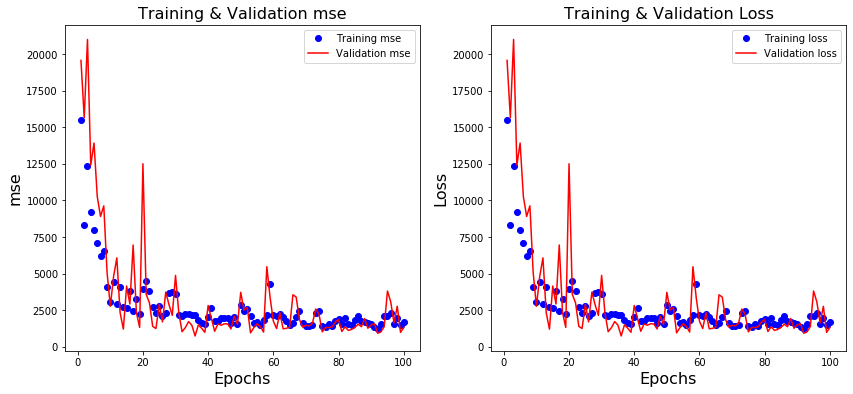

In [106]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mse']
val_accuracy = history_dict['val_mse']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model MSE vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training mse')
ax[0].plot(epochs, val_accuracy, 'r', label='Validation mse')
ax[0].set_title('Training & Validation mse', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('mse', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'r', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

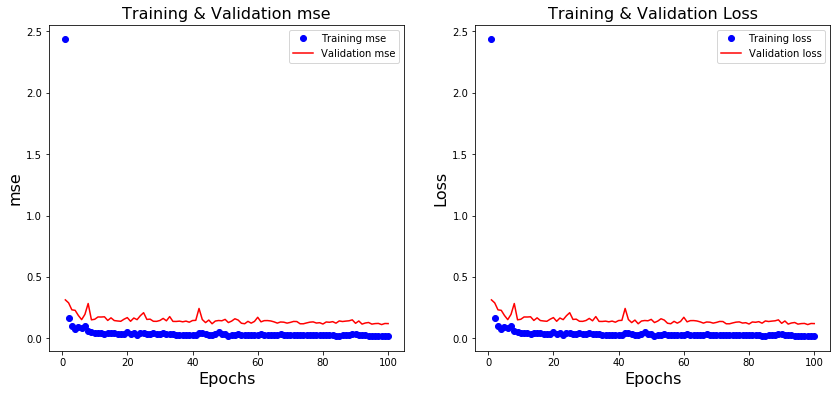

In [105]:
import matplotlib.pyplot as plt
 
history2_dict = history2.history
loss_values = history2_dict['loss']
val_loss_values = history2_dict['val_loss']
accuracy = history2_dict['mse']
val_accuracy = history2_dict['val_mse']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training mse')
ax[0].plot(epochs, val_accuracy, 'r', label='Validation mse')
ax[0].set_title('Training & Validation mse', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('mse', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'r', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()